In [1]:
%matplotlib notebook

import numpy as np

In [2]:
from multidynet.datasets import load_icews
from multidynet.plots import plot_network
from multidynet.model_selection import train_test_split

Y, countries = load_icews()

# Hold-out 10% of dyads for testing
Y_train, test_indices = train_test_split(Y, test_size=0.1)

In [16]:
from multidynet import DynamicMultilayerNetworkLSM

model = DynamicMultilayerNetworkLSM(max_iter=1000, n_features=2,
                                    a=4.0, b=20.0, c=20, d=2, 
                                    lambda_var_prior=10., 
                                    intercept_var_prior=10.,
                                    lambda_odds_prior=2,
                                    tol=1e-2,
                                    n_init=8,
                                    include_node_effects=True,
                                    random_state=123)
model.fit(Y_train)

<IPython.core.display.Javascript object>


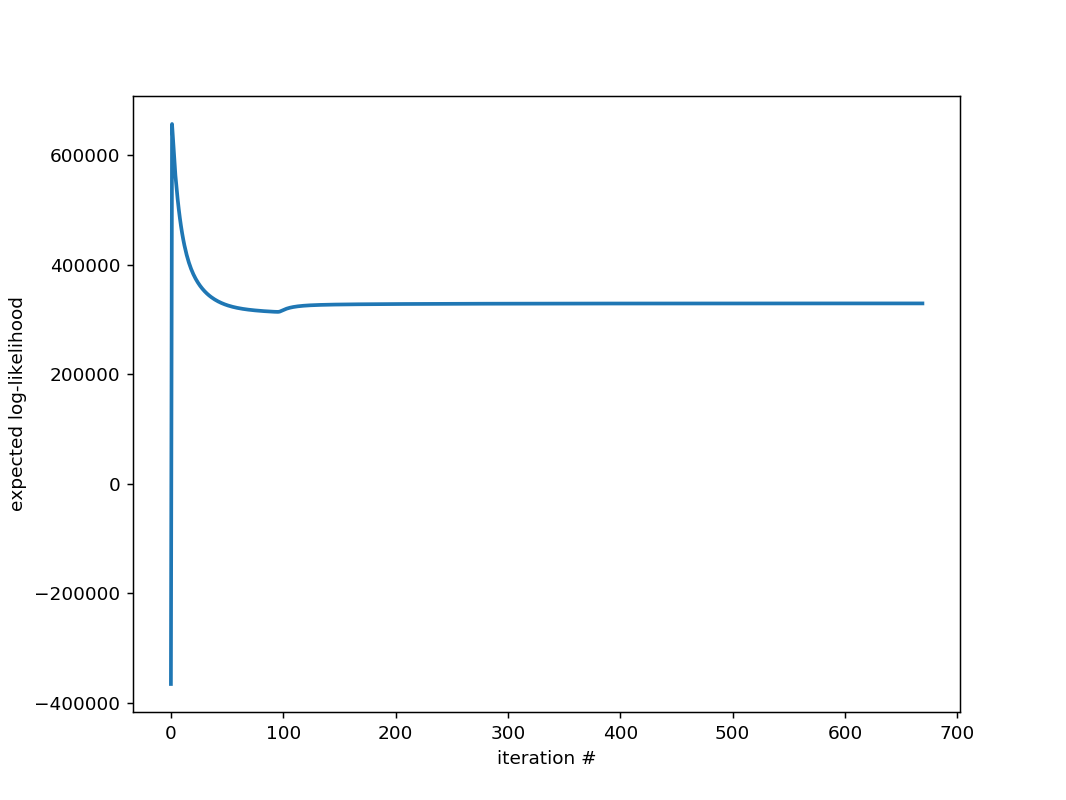

Text(0.5, 0, 'iteration #')

In [17]:
fig, ax= plt.subplots(figsize=(8, 6))
ax.plot(model.logp_, lw=2)
ax.set_ylabel('expected log-likelihood')
ax.set_xlabel('iteration #')

In [29]:
model.auc_

0.9017332890895136

In [30]:
from multidynet.metrics import calculate_auc

calculate_auc(Y, model.probas_, test_indices)

0.8974810222202789

<IPython.core.display.Javascript object>


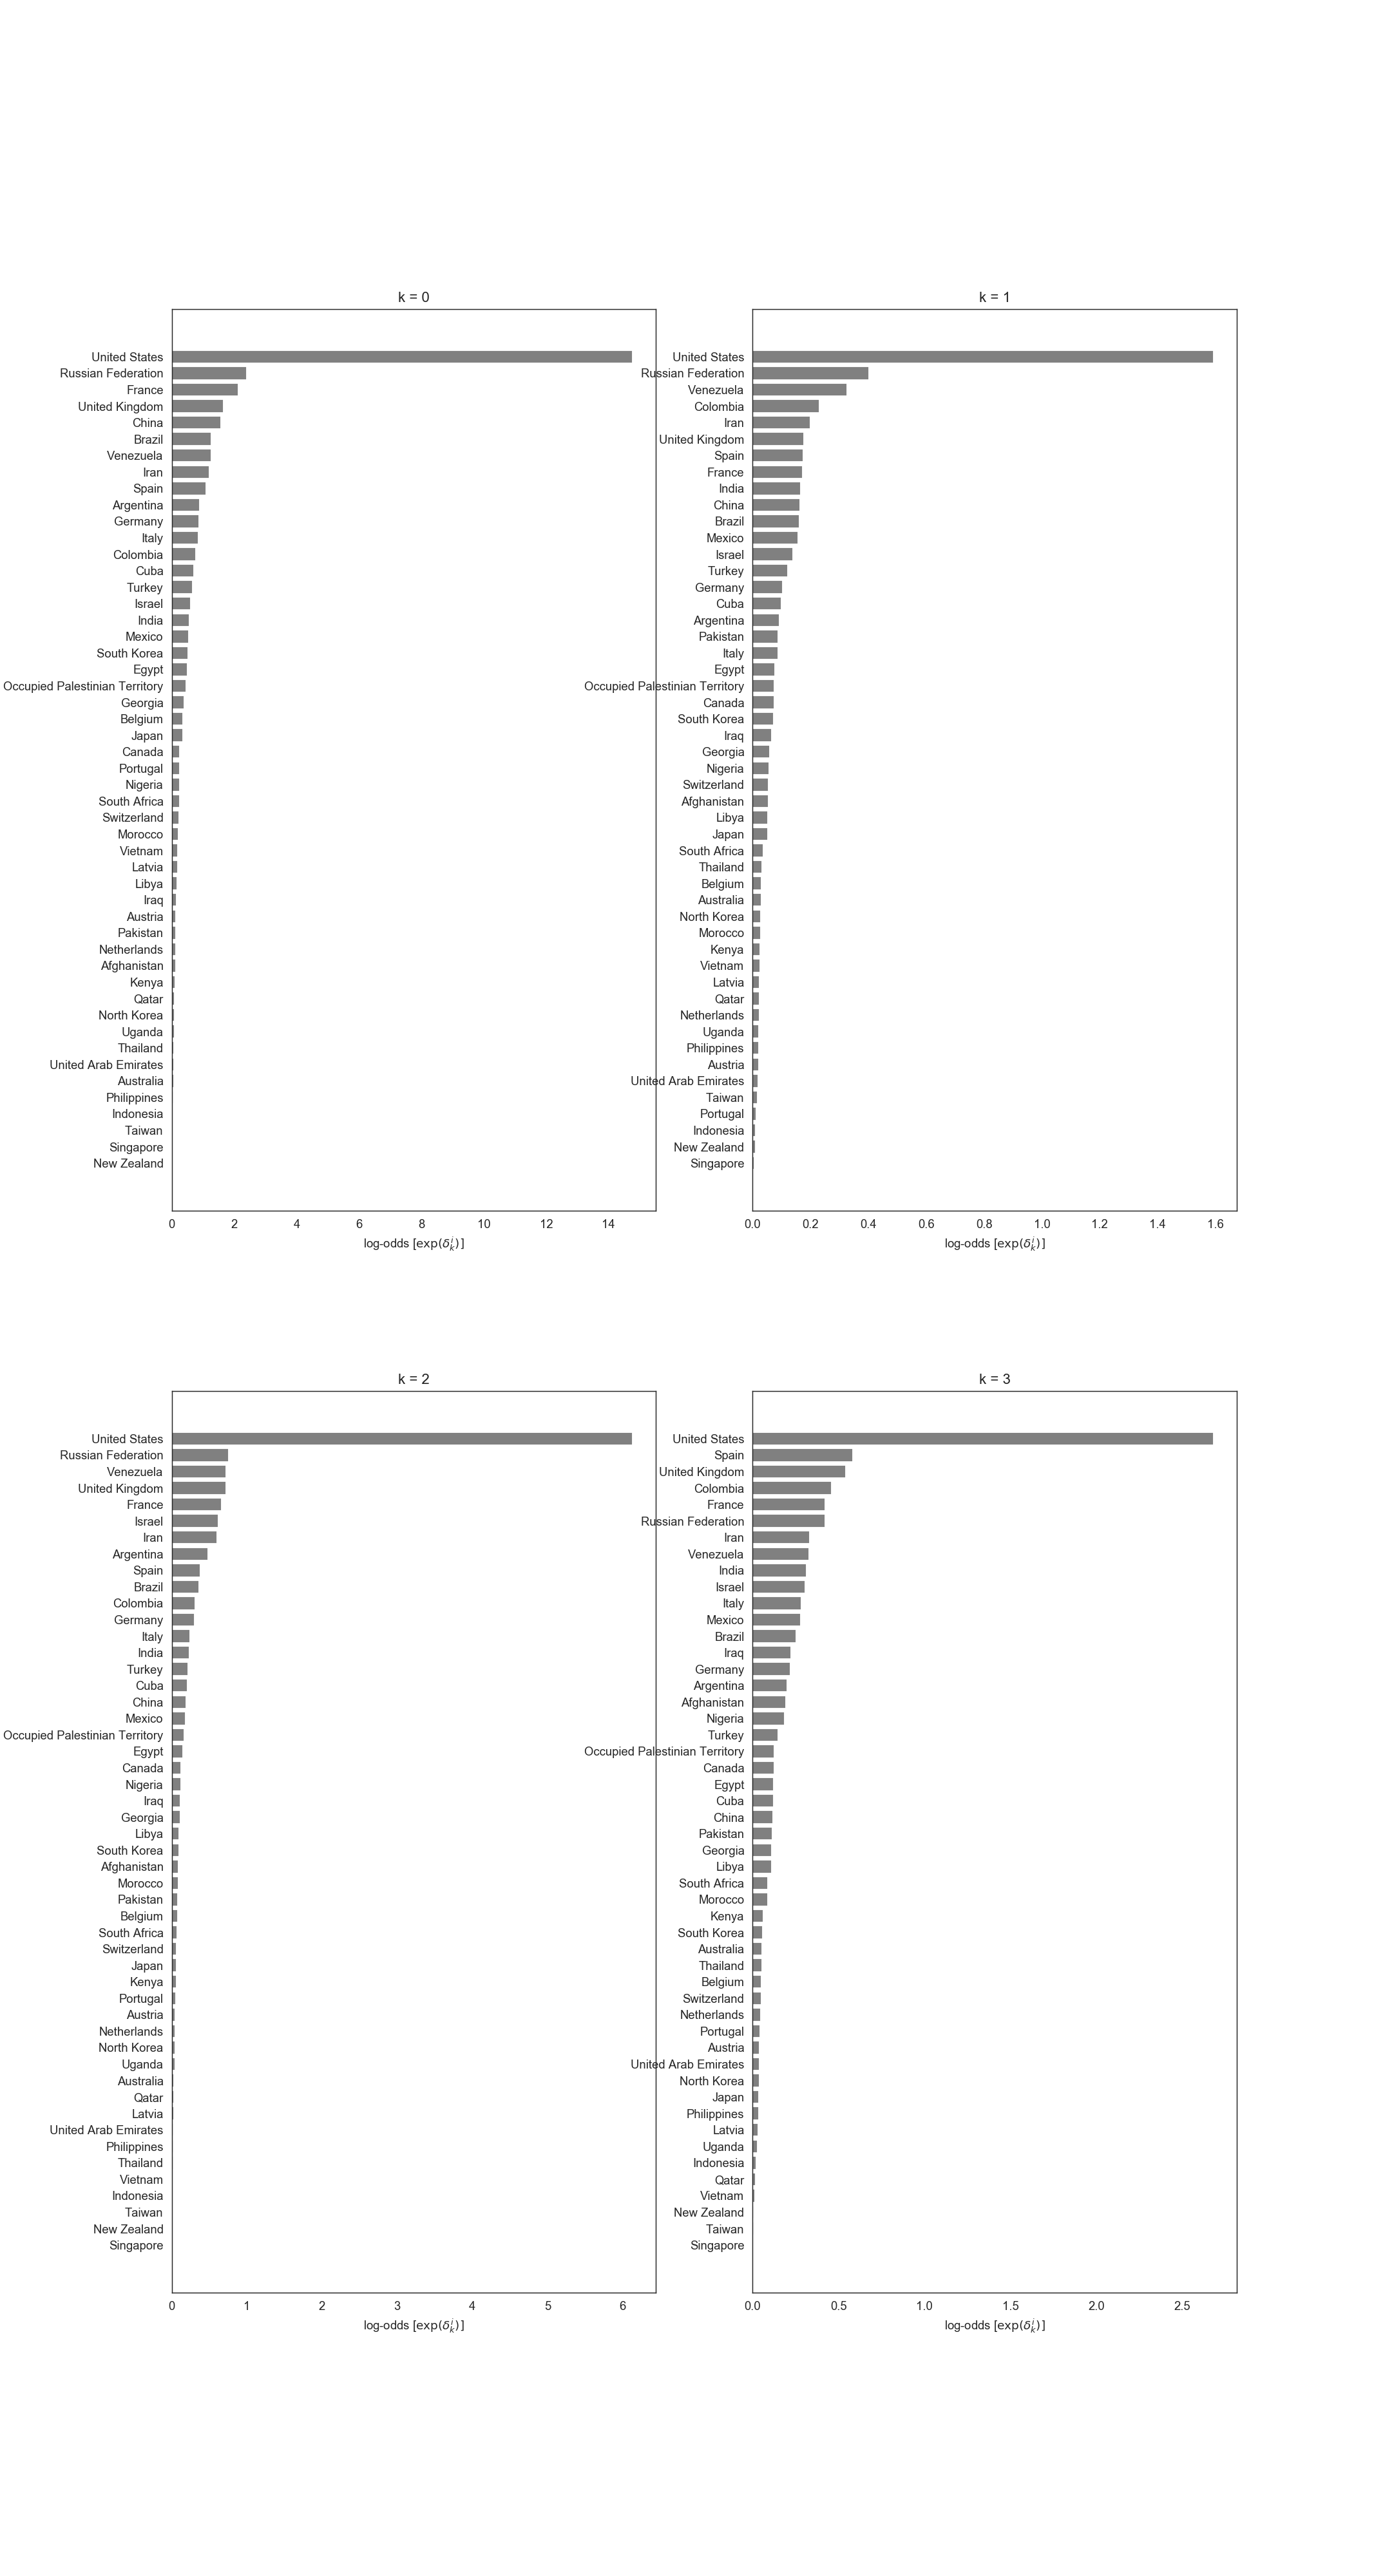

In [28]:
from multidynet.plots import plot_sociability


fig, axes = plt.subplots(2, 2, figsize=(16, 30))
for k, ax in enumerate(axes.flat):
    plot_sociability(model, k=k, node_labels=countries, ax=ax)

<IPython.core.display.Javascript object>


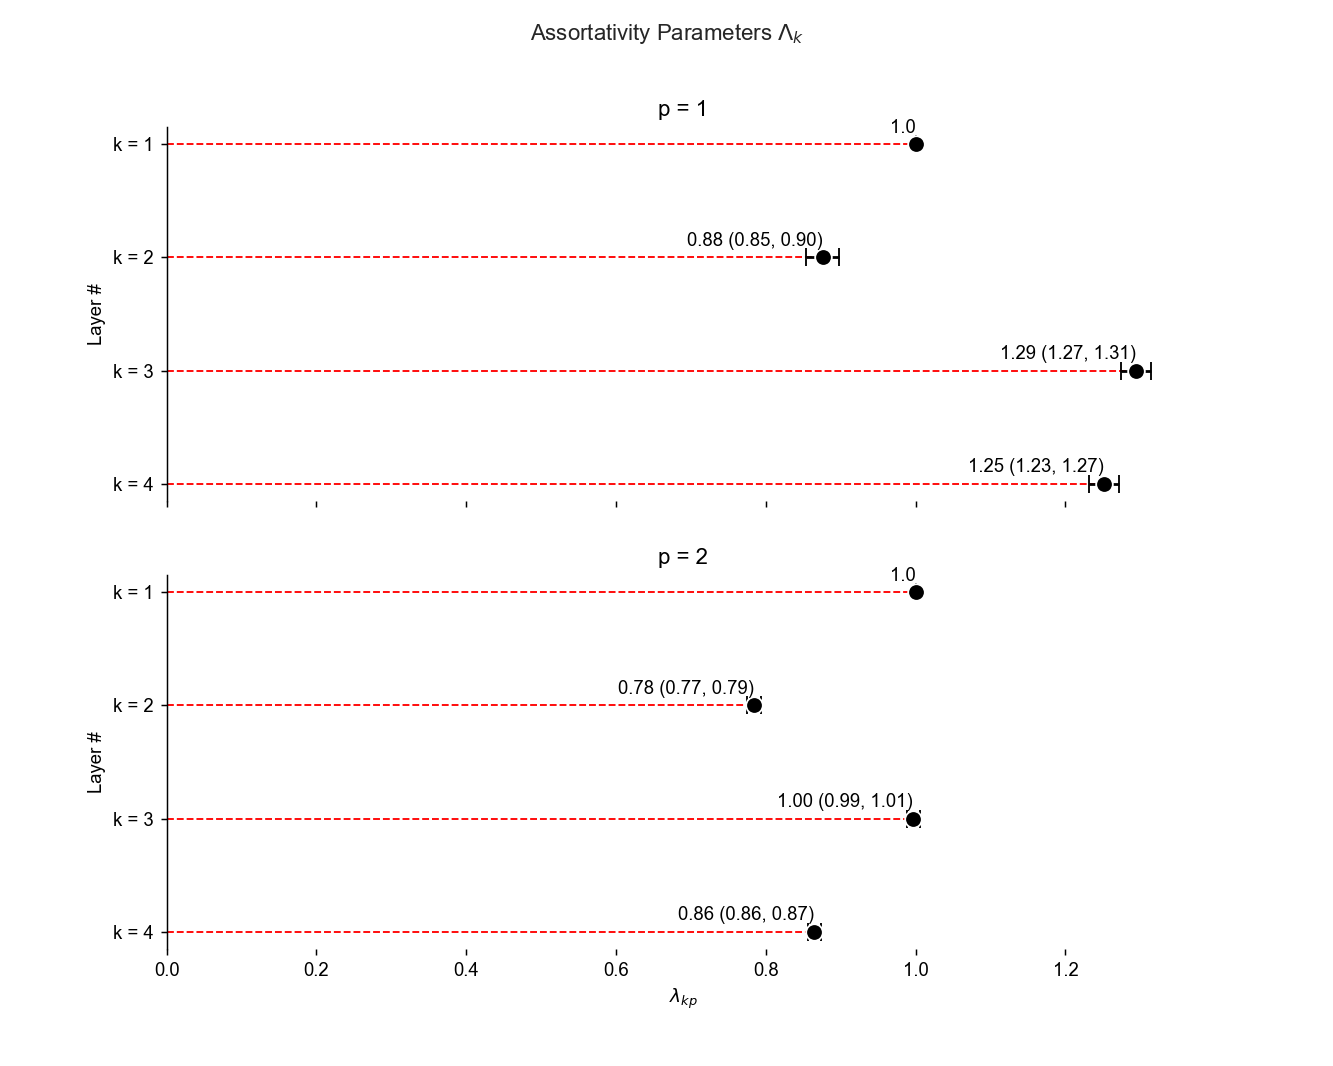

In [18]:
from multidynet.plots import plot_lambda

axes = plot_lambda(model, q_alpha=0.975)

<IPython.core.display.Javascript object>


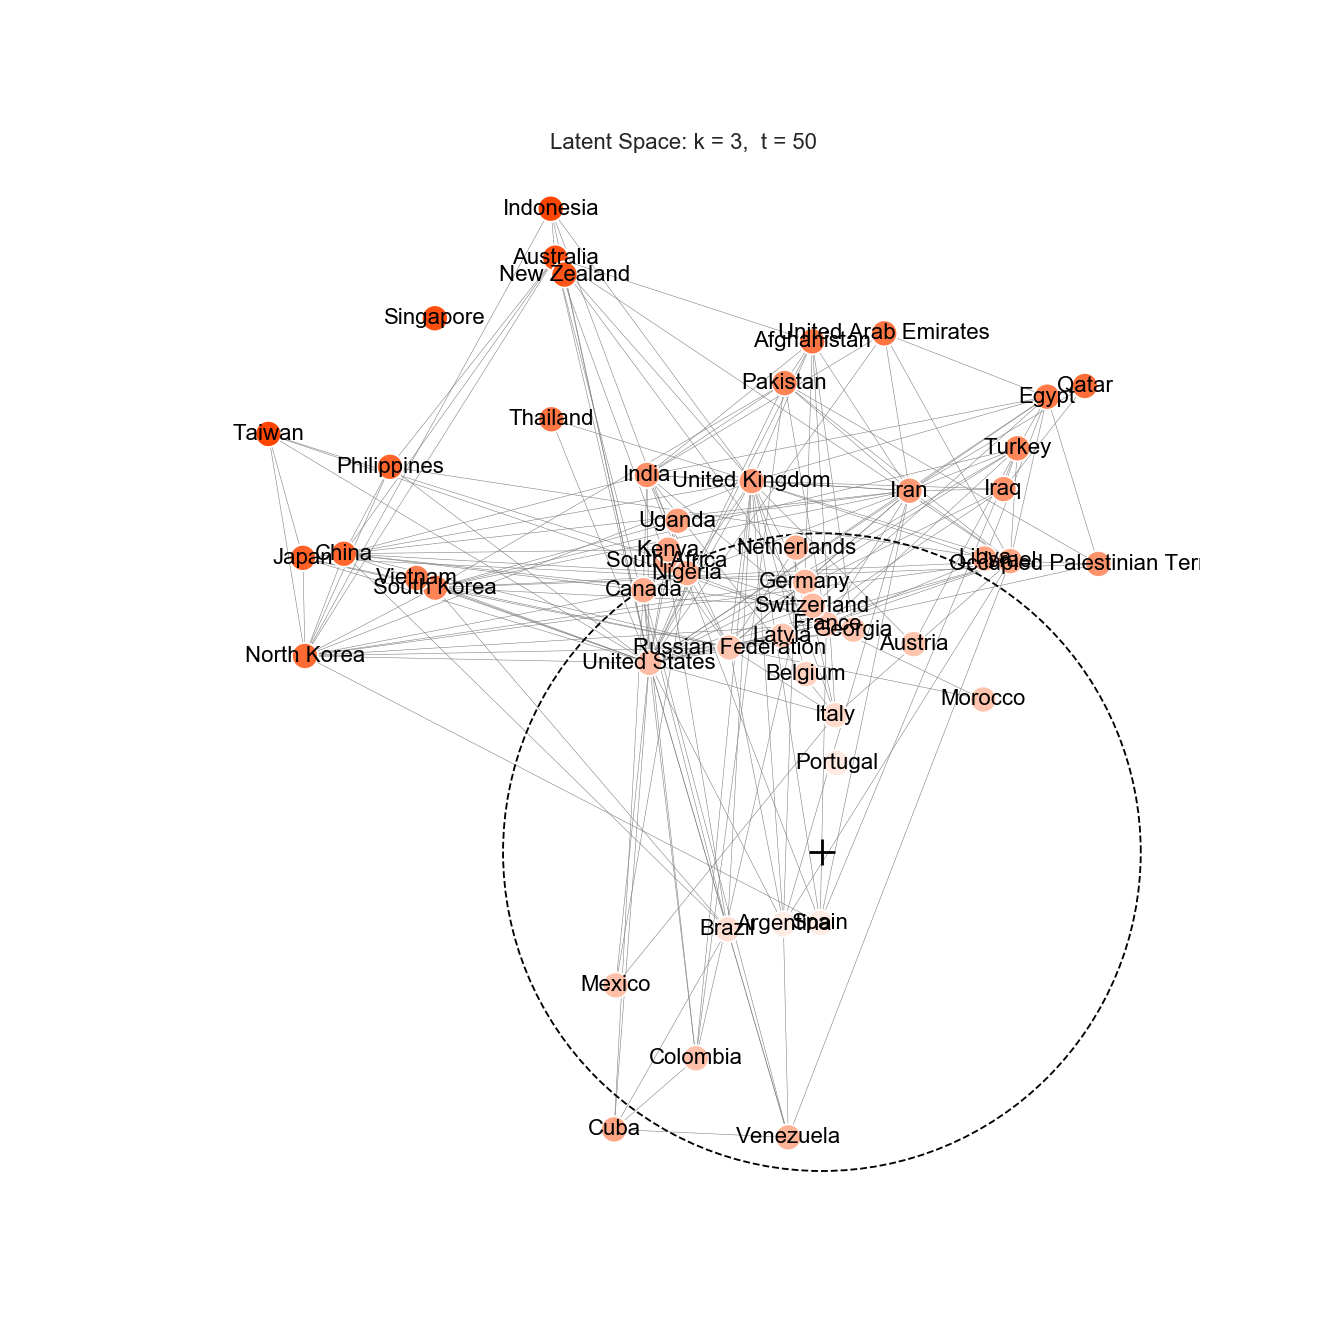

Text(0.5, 1.0, 'Latent Space: k = 3,  t = 50')

In [46]:
from multidynet.plots import plot_network, normal_contour

t = 49
k = 2

ax = plot_network(Y[k, t], model.X_[t], tau_sq=model.tau_sq_, normalize=False, node_labels=countries,
                  size=200, with_labels=True, font_size=12, 
                  edge_width=0.3, figsize=(10, 10))
ax.set_title('Latent Space: k = {},  t = {}'.format(k+1, t+1))

In [74]:
12 * 9

108

<IPython.core.display.Javascript object>


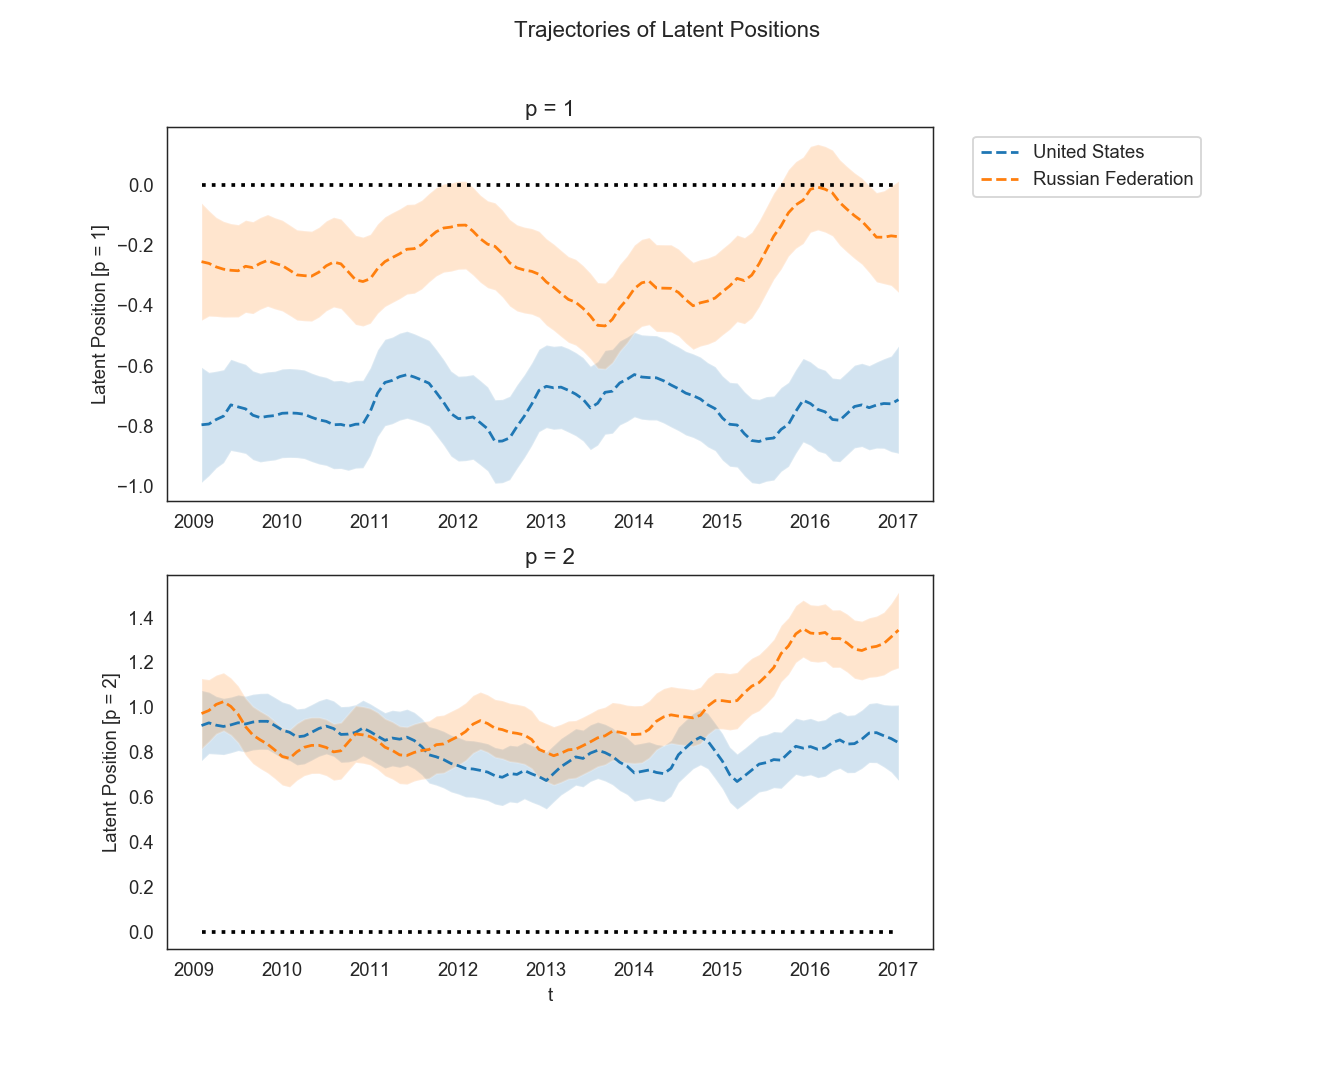

In [77]:
from multidynet.plots import plot_node_trajectories

ax = plot_node_trajectories(model, ['United States', 'Russian Federation'],
                            node_labels=countries, q_alpha=0.975, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])

In [58]:
a =ax[0]
a.set_xticklabels


<bound method _AxesBase.set_xticklabels of <matplotlib.axes._subplots.AxesSubplot object at 0x14233dd50>>

In [66]:
countries

array(['United States', 'United Kingdom', 'France', 'Australia', 'China',
       'India', 'Japan', 'South Korea', 'Russian Federation', 'Canada',
       'South Africa', 'Brazil', 'Germany', 'Iran', 'Nigeria', 'Spain',
       'Egypt', 'Philippines', 'Turkey', 'Cuba', 'Israel', 'Italy',
       'New Zealand', 'Georgia', 'Vietnam', 'Libya', 'Netherlands',
       'Belgium', 'Switzerland', 'United Arab Emirates', 'Argentina',
       'Uganda', 'Occupied Palestinian Territory', 'Thailand', 'Kenya',
       'Qatar', 'North Korea', 'Pakistan', 'Indonesia', 'Morocco',
       'Latvia', 'Afghanistan', 'Austria', 'Mexico', 'Singapore',
       'Taiwan', 'Venezuela', 'Colombia', 'Iraq', 'Portugal'],
      dtype='<U30')

<IPython.core.display.Javascript object>


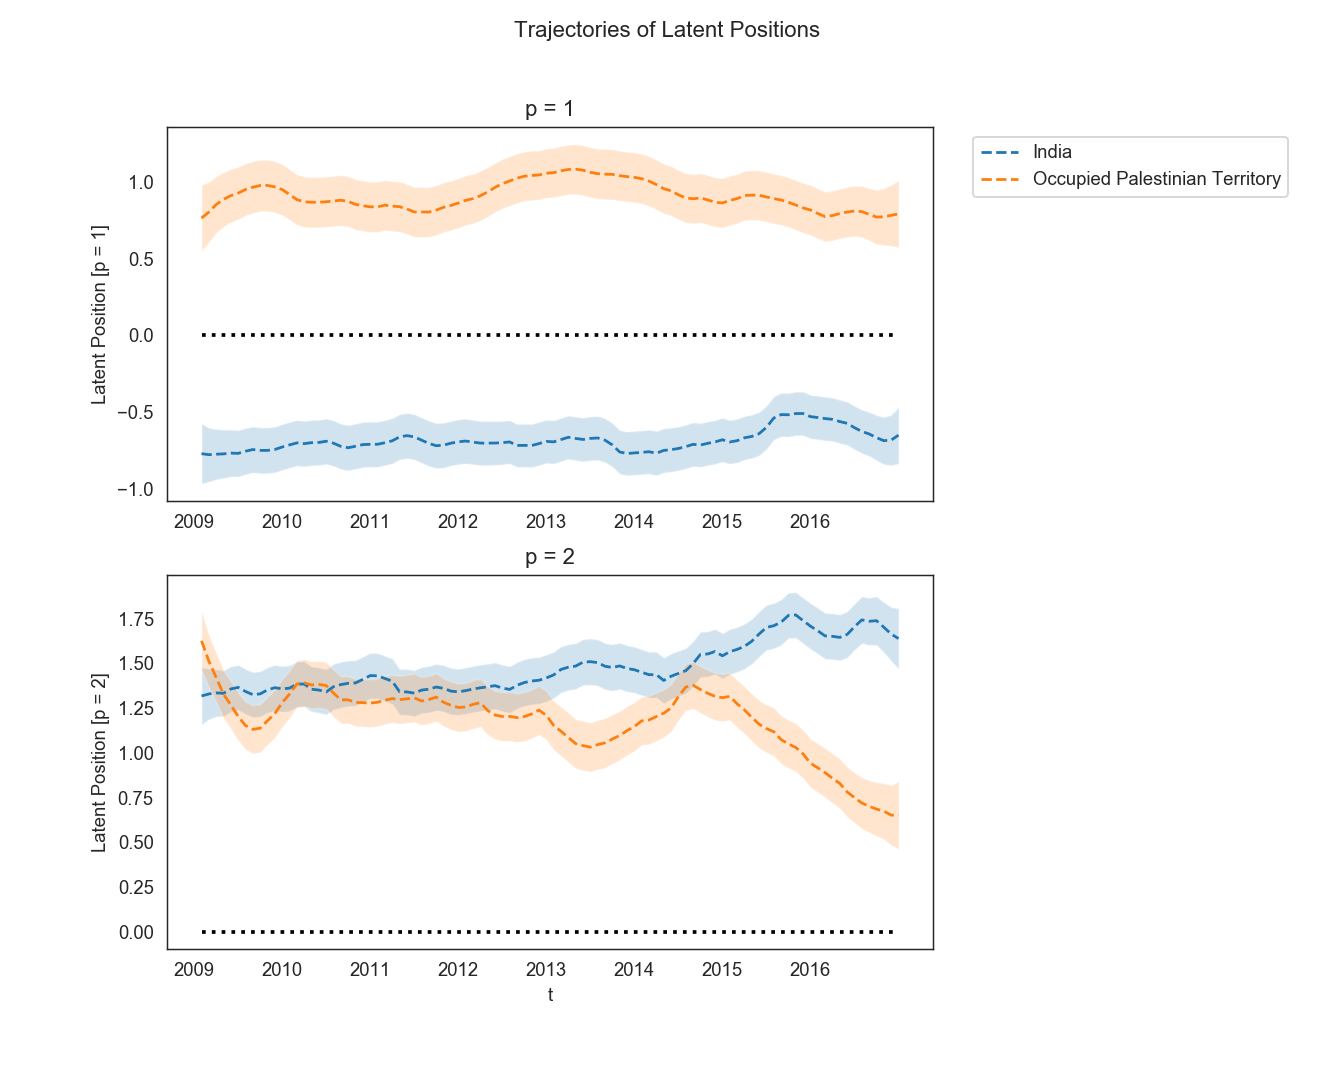

In [69]:
from multidynet.plots import plot_node_trajectories

ax = plot_node_trajectories(model, ['India', 'Occupied Palestinian Territory'],
                            node_labels=countries, q_alpha=0.975, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(8)])
    ax[p].set_xticklabels([2009 + i for i in range(8)])

<IPython.core.display.Javascript object>


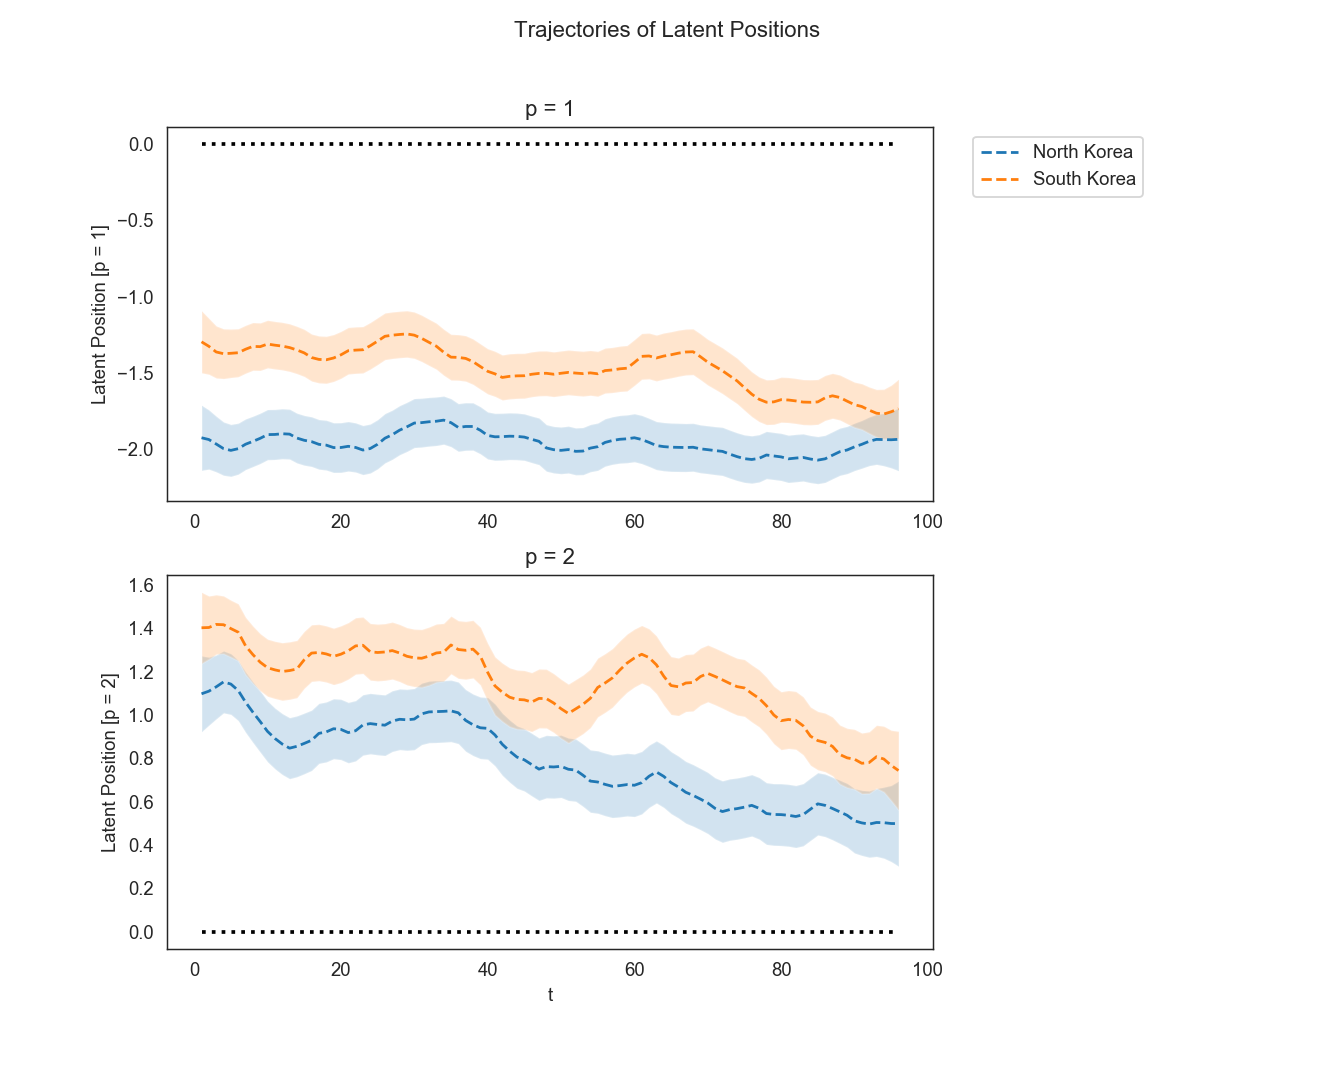

In [70]:
from multidynet.plots import plot_node_trajectories

ax = plot_node_trajectories(model, ['North Korea', 'South Korea'],
                            node_labels=countries, q_alpha=0.975, linestyle='--')


In [32]:
countries

array(['United States', 'United Kingdom', 'France', 'Australia', 'China',
       'India', 'Japan', 'South Korea', 'Russian Federation', 'Canada',
       'South Africa', 'Brazil', 'Germany', 'Iran', 'Nigeria', 'Spain',
       'Egypt', 'Philippines', 'Turkey', 'Cuba', 'Israel', 'Italy',
       'New Zealand', 'Georgia', 'Vietnam', 'Libya', 'Netherlands',
       'Belgium', 'Switzerland', 'United Arab Emirates', 'Argentina',
       'Uganda', 'Occupied Palestinian Territory', 'Thailand', 'Kenya',
       'Qatar', 'North Korea', 'Pakistan', 'Indonesia', 'Morocco',
       'Latvia', 'Afghanistan', 'Austria', 'Mexico', 'Singapore',
       'Taiwan', 'Venezuela', 'Colombia', 'Iraq', 'Portugal'],
      dtype='<U30')

In [31]:
import pickle

pickle.dump(model, open('ICEWS_2009-2016.pkl', 'wb'))

In [2]:
import pickle

model = pickle.load(open('ICEWS_2013-2016.pkl', 'rb'))